## Vanilla autoencoder transformation (encode-decode)

Considering a dataset with $p$ numerical attributes. 

The goal of the autoencoder is to reduce the dimension of $p$ to $k$, such that these $k$ attributes are enough to recompose the original $p$ attributes. However from the $k$ dimensionals the data is returned back to $p$ dimensions. The higher the quality of autoencoder the similiar is the output from the input. 

In [1]:
# DAL ToolBox
# version 1.01.727

source("https://raw.githubusercontent.com/cefet-rj-dal/daltoolbox/main/jupyter.R")

#loading DAL
load_library("daltoolbox")
load_library("ggplot2")

Loading required package: daltoolbox

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘daltoolbox’


The following object is masked from ‘package:base’:

    transform


Loading required package: ggplot2



### dataset for example 

In [2]:
data(sin_data)

sw_size <- 5
ts <- ts_data(sin_data$y, sw_size)

ts_head(ts)


t4,t3,t2,t1,t0
0.0000000,0.2474040,0.4794255,0.6816388,0.8414710
0.2474040,0.4794255,0.6816388,0.8414710,0.9489846
0.4794255,0.6816388,0.8414710,0.9489846,0.9974950
0.6816388,0.8414710,0.9489846,0.9974950,0.9839859
0.8414710,0.9489846,0.9974950,0.9839859,0.9092974
0.9489846,0.9974950,0.9839859,0.9092974,0.7780732


### applying data normalization

In [3]:
preproc <- ts_norm_gminmax()
preproc <- fit(preproc, ts)
ts <- transform(preproc, ts)

ts_head(ts)

t4,t3,t2,t1,t0
0.5004502,0.6243512,0.7405486,0.8418178,0.9218625
0.6243512,0.7405486,0.8418178,0.9218625,0.9757058
0.7405486,0.8418178,0.9218625,0.9757058,1.0000000
0.8418178,0.9218625,0.9757058,1.0000000,0.9932346
0.9218625,0.9757058,1.0000000,0.9932346,0.9558303
0.9757058,1.0000000,0.9932346,0.9558303,0.8901126


### spliting into training and test

In [4]:
samp <- ts_sample(ts, test_size = 10)
train <- as.data.frame(samp$train)
test <- as.data.frame(samp$test)

### creating autoencoder
Reduce from 5 to 3 dimensions

In [5]:
auto <- autoenc_encode_decode(5, 3)

auto <- fit(auto, train)

### learning curves

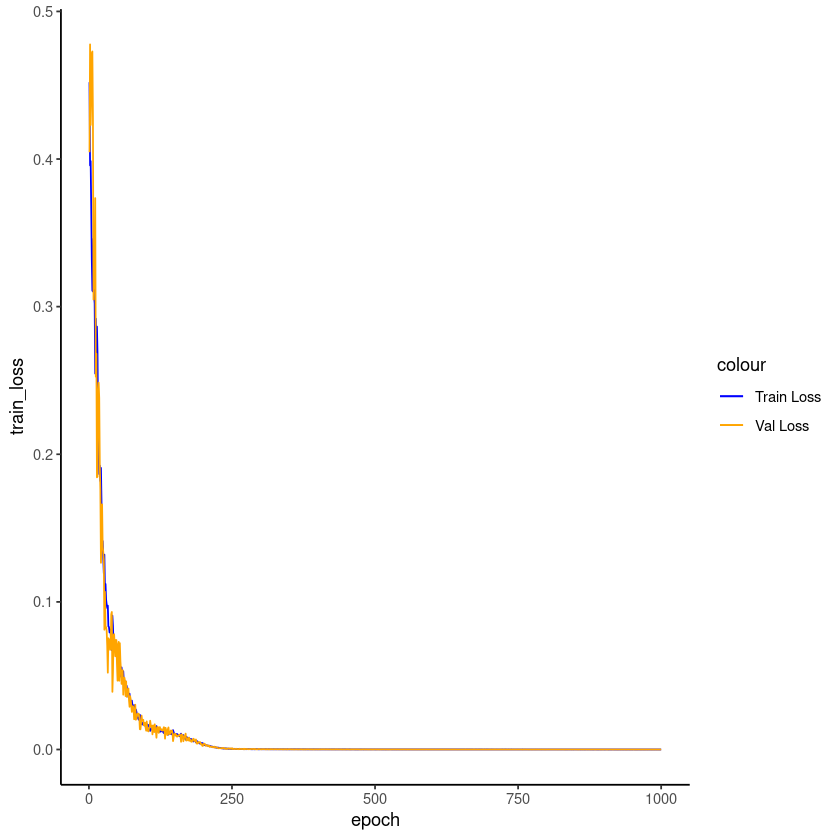

In [6]:
train_loss <- unlist(auto$model$train_loss)
val_loss <- unlist(auto$model$val_loss)

fit_loss <- as.data.frame(cbind(train_loss, val_loss))
fit_loss['epoch'] <- 1:nrow(fit_loss)

ggplot(fit_loss, aes(x=epoch)) +
geom_line(aes(y=train_loss, colour='Train Loss')) +
geom_line(aes(y=val_loss, colour='Val Loss')) +
scale_color_manual(values=c('Blue','Orange')) +
theme_classic()

### testing autoencoder
presenting the original test set and display encoding

In [7]:
print(head(test))
result <- transform(auto, test)
print(head(result))

         t4        t3        t2        t1        t0
1 0.7258342 0.8294719 0.9126527 0.9702046 0.9985496
2 0.8294719 0.9126527 0.9702046 0.9985496 0.9959251
3 0.9126527 0.9702046 0.9985496 0.9959251 0.9624944
4 0.9702046 0.9985496 0.9959251 0.9624944 0.9003360
5 0.9985496 0.9959251 0.9624944 0.9003360 0.8133146
6 0.9959251 0.9624944 0.9003360 0.8133146 0.7068409
          [,1]      [,2]      [,3]      [,4]      [,5]
[1,] 0.7252731 0.8276020 0.9158273 0.9756150 0.9953988
[2,] 0.8322195 0.9105452 0.9750853 1.0014783 0.9915808
[3,] 0.9154085 0.9688857 1.0000768 0.9941743 0.9591233
[4,] 0.9749981 0.9994337 0.9954041 0.9572172 0.8980213
[5,] 0.9982708 0.9948415 0.9607614 0.8959463 0.8191440
[6,] 0.9936814 0.9606031 0.8979957 0.8101805 0.7157648


In [8]:
result <- as.data.frame(result)
names(result) <- names(test)
r2 <- c()
mape <- c()
for (col in names(test)){
r2_col <- cor(test[col], result[col])^2
r2 <- append(r2, r2_col)
mape_col <- mean((abs((result[col] - test[col]))/test[col])[[col]])
mape <- append(mape, mape_col)
print(paste(col, 'R2 test:', r2_col, 'MAPE:', mape_col))
}
print(paste('Means R2 test:', mean(r2), 'MAPE:', mean(mape)))

[1] "t4 R2 test: 0.999521825954831 MAPE: 0.0023083662900732"
[1] "t3 R2 test: 0.999884001912921 MAPE: 0.00210424145776495"
[1] "t2 R2 test: 0.999710022661208 MAPE: 0.00405072058013458"
[1] "t1 R2 test: 0.999762043054427 MAPE: 0.00593672547631939"
[1] "t0 R2 test: 0.999732870064702 MAPE: 0.00580091729827938"
[1] "Means R2 test: 0.999722152729618 MAPE: 0.0040401942205143"
